<div style="border:solid green 3px; padding: 20px">
<b>🥇 Елизавета, спасибо за доработки, проект принят, молодец!</b>
    
Ты провела очень хорошую работу над ошибками! Уверен, ты обязательно достигнешь своей цели! Успехов в дальнейшем обучении! 🙂
    

Елизавета, привет! Меня зовут Ефимов Денис и сегодня я буду делать ревью твоего проекта!\
В Практикуме принято общаться на "ты", однако если это неудобно - дай знать, и можем перейти на более официальное общение.

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку: 

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Если все сделано хорошо. </div>

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> Некритичное замечание; если таких замечаний меньше трех — проект может быть принят без их отработки.</div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> Грубая ошибка, необходимо исправить, иначе проект не будет принят.
</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
Например так:
<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Hello World! ✔
</div>

Или можешь использовать эту галочку ✔ в моих комментариях, если писать особо нечего.

<div class="alert alert-block alert-warning">
<b>Общее впечатление:</b> 
    
- Ты проделала огромную работу и проект получился впечатляющим:)
- У меня есть несколько замечаний, исправив которые ты сделаешь проект еще лучше.
- Пробегись по моим комментариям, исправь недочёты и всё будет отлично :)
    
</div>



<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера 2:</b> 

Обрати внимание, что желтых комментариев более трех, а значит их тоже необходимо обработать, иначе я не смогу принять проект.</div>

## Исследование сервиса аренды самокатов GoFast

###### Цель исследования:
1. Описать и визуализировать общую информацию о пользователях и поездках.
2. Визуализировать информацию о расстоянии и времени поездок для пользователей каждой из категорий пользователей (с подпиской и без).
3. Подсчитать выручку.
4. Проверить гипотезы:
    4.1 Тратят ли пользователи с подпиской больше времени на поездки?
    4.2 Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает оптимальное с точки зрения износа самоката? 
    4.3 Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?
5. Выяснить, какое минимальное количество промокодов нужно разослать в ходе маркетинговой акции, чтобы вероятность не выполнить план была примерно 5% (план 10% на основании предыдущей акции)

###### Ход исследования:

Данные о пользователях сервиса я получу из нескольких файлов: '/datasets/users_go.csv', '/datasets/rides_go.csv', '/datasets/subscriptions_go.csv'. О качестве данных ничего не известно, поэтому прежде чем приступать к анализу, понадобится обзор данных.

Я проверю данные на ошибки, дубликаты, оценю влияние пропусков на ход исследования, преобразую необходимые столбцы в нужный тип. Далее поведу необходимы объединения таблиц и приступлю к исследованию данных.

Таким образом мое исследование пройдет в несколько этапов:
- Обзор данных.
- Предобработка данных. 
- Исследовательский анализ данных.
- Объединение данных.
- Подсчет выручки.
- Проверка гипотез.
- Исследования для проведения маркетинговой акции.


<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Молодец, что написала введение!  </div>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
from scipy.stats import binom
from math import sqrt

#### Шаг 1. Загрузка данных

Загрузим данные из каждого датасета и изучим их.

In [2]:
data_users = pd.read_csv('/datasets/users_go.csv')
data_users.head(20)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [3]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В датасете содержатся данные о id пользователя, имени, возрасте, городе и типе подписки. С типами данных все нормально

In [4]:
data_rides = pd.read_csv('/datasets/rides_go.csv')
data_rides.head(20)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [5]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


В этом датасете содержатся данные о id пользователя, расстоянии (м), длительности (мин) и дате поездки. Здесь нужно будет преобразовать данные в тип даты в столбце date.

In [6]:
data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
data_subscriptions.head(20)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [7]:
data_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В последнем датасете содержится информация о типе подписки, стоимости минуты поездки, стоимости начала поездки и стоимости подписки.

Вывод: датасеты первоночально изучены, в них действительно содержится информация, заявленная в документах.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Отлично, с данными познакомились!  </div>

#### Шаг 2. Предобработка данных

Прежде чем дальше использоать данные в исследовании, необходимо преобразовать тип данных в столбце date второго датасета и проверить все данные на наличие пропусков и дубликатов.

1. Преобразуем данные в столбце date второго датасета.

In [8]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%dT%H:%M:%S')
data_rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [9]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Данные преобразованы в нужный формат. Теперь создадим новый столбец с номером месяца на основе столбца date.

In [10]:
data_rides['month'] = data_rides['date'].dt.month
data_rides.head(10)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
5,1,2770.890808,16.650138,2021-10-09,10
6,1,3039.020292,14.927879,2021-10-19,10
7,1,2842.118050,23.117468,2021-11-06,11
8,1,3412.690668,15.238072,2021-11-14,11
9,1,748.690645,15.041884,2021-11-22,11


<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 

Дополнительно можно проверить данные за какой период у нас имеются</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Готово ✔
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

Проверим, за какой период предоставлены данные:

In [11]:
data_rides['date'].min()

Timestamp('2021-01-01 00:00:00')

In [12]:
data_rides['date'].max()

Timestamp('2021-12-30 00:00:00')

Получается, данные нам предоставили за весь 2021 год.

Проверим наличие пропущенных значений и дубликатов в датафреймах. 

In [13]:
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [14]:
data_users.duplicated().sum()

31

In [15]:
data_users = data_users.drop_duplicates().reset_index(drop=True)

Проверим наличие неявных дубликатов в столбце с названиями города.

In [16]:
data_users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

В первом датасете предобработка завершена: Пропущенных значений не обнаружено, 31 дубликат удален, столбец с названиями городов проверен на наличие неявных дубликатов(в столбцах, содержащих имя пользователя и возраст, повторяющиеся значения допустимы. 

In [17]:
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [18]:
data_rides.duplicated().sum()

0

Во втором датасете предобработка завершена: пропущенных значений и дубликатов не обнаружено.

In [19]:
data_subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [20]:
data_subscriptions.duplicated().sum()

0

Во третьем датасете предобработка завершена: пропущенных значений и дубликатов не обнаружено.

Вывод: данные готовы к дальнейшим исследованиям, типы данных преобразованы, пропусков и дубликатов нет.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Молодец, что делаешь промежуточные выводы!  </div>

#### Шаг 3. Исследовательский анализ данных

1. Исследуем частоту встречаемости городов с помощью гистограммы.

<AxesSubplot:>

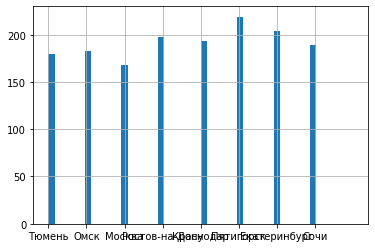

In [21]:
data_users['city'].hist(bins=50, range=(0, 8))

In [22]:
city = data_users['city'].value_counts()

<AxesSubplot:title={'center':'частота встречаемости городов'}>

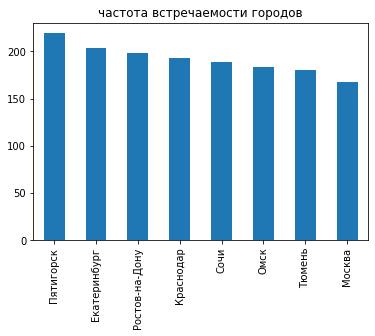

In [23]:
city.plot(title='частота встречаемости городов', kind='bar')

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Такой график не очень информативен. Для категориальных признаков гистограмма не совсем подходит. К тому же подписи на оси сливаются. Тут лучше построить горизонтальный барплот с сортировкой по убыванию. Данные для построения графика можно получить с помощью метода value_counts(). Также эти данные стоит отобразить и в табличном виде, чтобы была возможность сравнить значения количества.</div>


<div class="alert alert-info"> <b>Комментарии студента:</b> Исправила. Спасибо, что подсказал, как сделать график более читаемым. </div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍 Пожалуйста) А еще нагляднее будет горизонтальный барплот, о котором я писал. Показал ниже. </div>

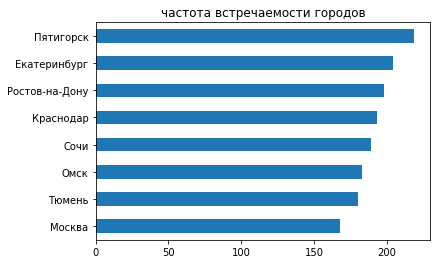

In [24]:
# код ревьюера
city.sort_values().plot(title='частота встречаемости городов', kind='barh')

plt.show()

Наиболее популярен сервис в Пятигорске, наименьшей популярностью пользуется в Москве.

2. Исследуем соотношение пользователей с подпиской и без подписки.

<AxesSubplot:>

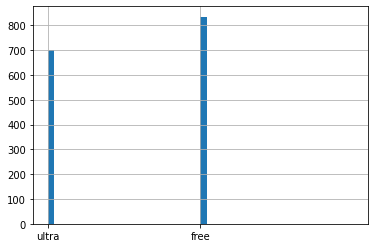

In [25]:
data_users['subscription_type'].hist(bins=50, range=(0, 2))

<AxesSubplot:title={'center':'Количество пользователей с подпиской и без подписки'}>

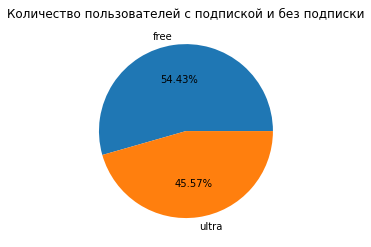

In [26]:
data_users['subscription_type'].value_counts().plot(title='Количество пользователей с подпиской и без подписки', kind='pie', autopct='%1.2f%%', ylabel='')

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b>
    
Необходимо подписывать каждый график и оси на нем для удобства восприятия. Есть [хорошая статья](https://devpractice.ru/matplotlib-lesson-3-3-text-elements/), которая подскажет как это правильно сделать). </div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>


<div class="alert alert-info"> <b>Комментарии студента:</b> Построила круговую диаграмму, подписала ее. Не знаю, как сделать отображение соотношение групп в % </div>

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера 2:</b> 
    

 - Значения долей отобразить на диаграмме можно с помощью аргумента `autopct`

 - Подпись оси тут лучше убрать, так как суть диаграммы описана в названии.</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Исправила.
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Тут отлично подошла бы круговая диаграмма с отображением на ней соотношения групп пользователей в %</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

Пользователей без подписки больше примерно на 20%

3. Исследуем возраст пользователей.

Text(0, 0.5, 'Частота встречаемости')

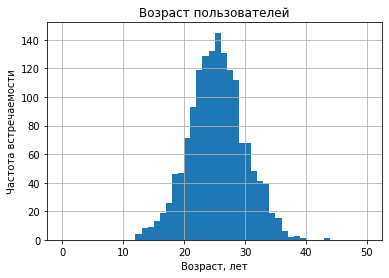

In [27]:
data_users['age'].hist(bins=50, range=(0, 50))
plt.title('Возраст пользователей')
plt.xlabel("Возраст, лет")
plt.ylabel("Частота встречаемости")

In [28]:
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Большинство пользователей сервиса в возрасте от 22 до 38 лет.

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Дополнительно для анализа можно использовать метод `describe()` </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Добавила ✔
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

4. Исследуем расстояние, которое пользователь преодолел за одну поездку.

Text(0, 0.5, 'Частота встречаемости')

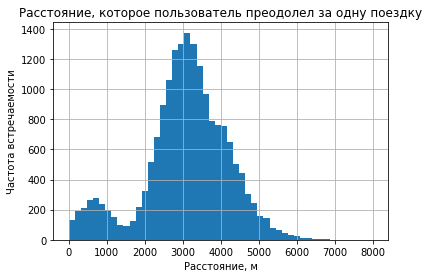

In [29]:
data_rides['distance'].hist(bins=50, range=(0, 8000))
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel("Расстояние, м")
plt.ylabel("Частота встречаемости")

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера 2:</b>
    
Каждый график в проекте и оси на нем должны быть подписаны. Без этого проект не может быть принят. Проверь этот момент, пожалуйста. 

P.S. Выше я оставлял ссылку на статью, в которой показано как это сделать</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Исправила.
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

На основании этой гистограммы мы можем следать вывод, что клиенты сервиса чаще всего используют самокаты для поездок на расстояние от 2 до 5 км. Более большие расстояния преодолеваются на самокатах значительно реже. Также есть небольшой всплеск активности на расстоянии до 1,5 км.

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Как ты думаешь, чем можно объяснить два пиковых значения на распределении?</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Тем, что некоторые пользователи без подписки быстро заканчивают поездку, возможно берут самокат, чтобы попробовать сервис.
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Также это могут быть поездки до ближайшей станции метро или остановки.  </div>

5. Исследуем продолжительность поездок на такой же гистограмме.

Text(0, 0.5, 'Частота встречаемости')

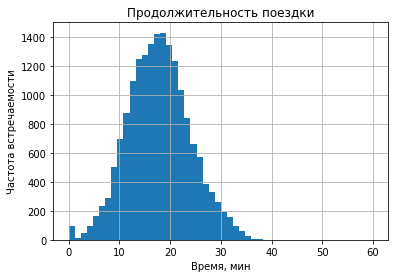

In [30]:
data_rides['duration'].hist(bins=50, range=(0, 60))
plt.title('Продолжительность поездки')
plt.xlabel("Время, мин")
plt.ylabel("Частота встречаемости")

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Напомню, что каждый график в проекте и оси на нем должны быть подписаны</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>


<div class="alert alert-info"> <b>Комментарии студента:</b> Построила гистограммы с помощью plot, не нашла способ подписать предыдущие гистограммы. Так же не понимаю, почему не подписываются оси? Что делаю не так?</div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера 2:</b>
    
Есть [хорошая статья](https://devpractice.ru/matplotlib-lesson-3-3-text-elements/), ссылку на нее я уже оставлял выше, там показано как это можно сделать. 

Не обязательно строить новые гистограммы с помощью plot, подписи можно добавить к построенным c помощью hist гистограммам, они выглядят намного нагляднее) </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Готово, все исправила ✔
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

Длительность поездки в среднем от 10 до 30 минут.

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 
    
Не обратила ли ты внимание на странный пик около 0? Строки с этими значениями стоит рассмотреть на предмет аномалий. </div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Да, я обратила внимание на наличие пика около 0, но решила, что это критически не влияет на исследование и оставила как есть.</div>

Вывод: общая информация о пользователях и поездках визуализирована, на графиках наглядно показано, как распределяются различные значения, каких пользователей больше, как и для каких поездок клиенты используют услуги сервиса.

#### Шаг 4. Объединение данных

1. Объединим все три датафрейма в один.

In [31]:
data = data_users.merge(data_rides, on='user_id', how='left')
data.head(20)

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11


In [32]:
data = data.merge(data_subscriptions, on='subscription_type', how='left')
data.head(20)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Тут стоит проверить количество строк полученной таблицы и сравнить ее с количеством строк таблиц до объединения, чтобы убедиться что мы ничего не потеряли.

</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Проверила, ничего не потерялось ✔
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

Проверим количество строк в исходных таблицах, и в таблице после объединения.

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [34]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.0+ KB


In [35]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


In [36]:
data_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В общей таблиц такое же количество строк, как и в самой большой исходной таблице с информацией о поездках, значит, мы ничего не потеряли в ходе объединения.

Общий датафрейм создан.

2. Создадим из общего датафрейма отдельный датафрейм c данными о пользователях без подписки.

In [37]:
data_free = data[data['subscription_type'] == 'free']
data_free.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
6505,700,Айдар,22,Омск,free,4342.002254,22.368009,2021-02-23,2,8,50,0
6506,700,Айдар,22,Омск,free,3798.334905,18.243756,2021-03-03,3,8,50,0
6507,700,Айдар,22,Омск,free,2984.551206,15.424899,2021-04-09,4,8,50,0
6508,700,Айдар,22,Омск,free,3360.107141,16.765497,2021-06-12,6,8,50,0
6509,700,Айдар,22,Омск,free,2567.543847,11.312160,2021-06-23,6,8,50,0


3. Создадим из общего датафрейма отдельный датафрейм c данными о пользователях с подпиской.

In [38]:
data_ultra = data[data['subscription_type'] == 'ultra']
data_ultra.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Таблицы созданы верно!  </div>

4. Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

Расстояние поездок у пользователей без подписки рассмотрим с помощью гистограммы.

Text(0, 0.5, 'Частота встречаемости')

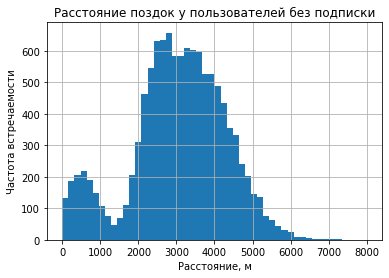

In [39]:
data_free['distance'].hist(bins=50, range=(0, 8000))
plt.title('Расстояние поздок у пользователей без подписки')
plt.xlabel("Расстояние, м")
plt.ylabel("Частота встречаемости")

Пользователи без подписки проезжают в основном от 2 до 5 км. При это присутствует всплеск значений на дисстанции до 1 км. Возможно, поьзователей что-то не устраивает и они начав поездку, практически сразу ее заканчивают.

Посмотрим, как обстоят дела у пользователей с подпиской.

Text(0, 0.5, 'Частота встречаемости')

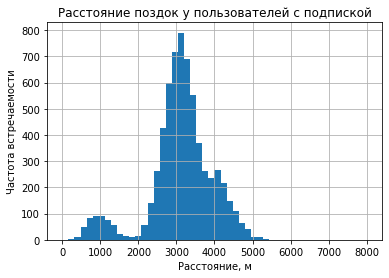

In [40]:
data_ultra['distance'].hist(bins=50, range=(0, 8000))
plt.title('Расстояние поздок у пользователей с подпиской')
plt.xlabel("Расстояние, м")
plt.ylabel("Частота встречаемости")

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 

Распределения для обеих групп пользователей можно объединить для наглядности, наложив их друг на друга.</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Ниже наложила гистограммы друг на друга ✔
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

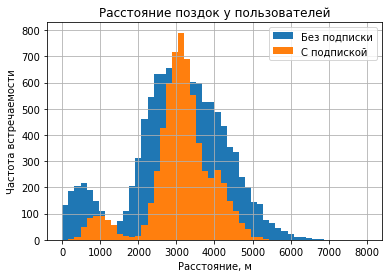

In [41]:
data_free['distance'].hist(bins=50, range=(0, 8000))
data_ultra['distance'].hist(bins=50, range=(0, 8000))
plt.title('Расстояние поздок у пользователей')
plt.xlabel("Расстояние, м")
plt.ylabel("Частота встречаемости")
plt.legend (('Без подписки', 'С подпиской'))

У пользователей с подпиской тоже есть такой всплеск в районе 1 км. Но он значительно меньше относительно общей массы пользователей, которые пользуются сервисом с подпиской. Пик гистограммы более ярко выражен, такие пользователи чаще ездят на расстояние примерно 2,5 - 3,5 км.

Рассмотрим, как распределяется время поездок у этих категорий.

Text(0, 0.5, 'Частота встречаемости')

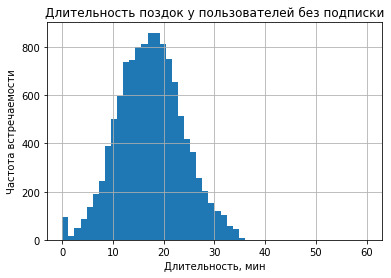

In [42]:
data_free['duration'].hist(bins=50, range=(0, 60))
plt.title('Длительность поздок у пользователей без подписки')
plt.xlabel("Длительность, мин")
plt.ylabel("Частота встречаемости")

Text(0, 0.5, 'Частота встречаемости')

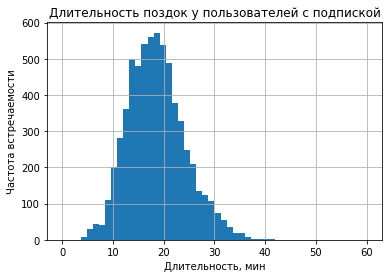

In [43]:
data_ultra['duration'].hist(bins=50, range=(0, 60))
plt.title('Длительность поздок у пользователей с подпиской')
plt.xlabel("Длительность, мин")
plt.ylabel("Частота встречаемости")

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Не забывай подписывать графики и оси</div>


<div class="alert alert-info"> <b>Комментарии студента:</b> Подписала.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

Аналогично, пользователи с подпиской, как будто ездят на самокатах более интенсивно, пик 10-25 минут. При том, что у пользователей без подписки на гистограмме есть всплески около нуля, как будто человек начал поездку и сразу ее завершил, у таких пользователей значений от 0 до 10 минут больше. у клиентов с подпиской такого не наблюдается.

Вывод: Клиенты с подпиской сервиса пользуются сервисом более интенсивно и целенаправленно.

#### Шаг 5. Подсчёт выручки

Округлим длительность поездки до следующего целого числа в изначальной таблице

In [44]:
data['duration'] = np.ceil(data['duration']) 

Создаем датафрейм с нужными столбцами и группируем по id и месяцу

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 

К выбору имен для переменных стоит подходить более осознанно, они должны отражать суть содержимого)</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

In [45]:
data_grouped = data.groupby(['user_id', 'subscription_type', 'month'], as_index=False).agg({'distance':'sum', 'name': 'count', 'duration': 'sum'})
data_grouped.head(20)

,user_id,subscription_type,month,distance,name,duration
0,1,ultra,1,7027.511294,2,42.0
1,1,ultra,4,754.159807,1,7.0
2,1,ultra,8,6723.470560,2,46.0
3,1,ultra,10,5809.911100,2,32.0
4,1,ultra,11,7003.499363,3,56.0
5,1,ultra,12,6751.629942,2,28.0
6,2,ultra,3,10187.723006,3,63.0
7,2,ultra,4,6164.381824,2,40.0
8,2,ultra,6,3255.338202,1,14.0
9,2,ultra,7,6780.722964,2,48.0


<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Метод округления выбран верный, но округлять необходимо каждую поездку, то есть в исходной таблице до агрегирования.


</div>


<div class="alert alert-info"> <b>Комментарии студента:</b> Перенесла округление в начало задания, округлила заначения в исходной таблице data./div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

Создаем функцию, которая в зависимости от типа подписки будет считать помесячную выручку

In [46]:
def income_per_month(row):
    if row['subscription_type'] == 'free':
        return (50 * row['name']) + 8 * row['duration']
    if row['subscription_type'] == 'ultra':
        return 6 * row['duration'] + 199
data_grouped['income_per_month'] = data_grouped.apply(income_per_month, axis=1)
data_grouped.head(20)

,user_id,subscription_type,month,distance,name,duration,income_per_month
0,1,ultra,1,7027.511294,2,42.0,451.0
1,1,ultra,4,754.159807,1,7.0,241.0
2,1,ultra,8,6723.470560,2,46.0,475.0
3,1,ultra,10,5809.911100,2,32.0,391.0
4,1,ultra,11,7003.499363,3,56.0,535.0
5,1,ultra,12,6751.629942,2,28.0,367.0
6,2,ultra,3,10187.723006,3,63.0,577.0
7,2,ultra,4,6164.381824,2,40.0,439.0
8,2,ultra,6,3255.338202,1,14.0,283.0
9,2,ultra,7,6780.722964,2,48.0,487.0


<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 
    
Молодец ,что написала функцию для расчета выручки!

Но код должен быть более универсальным, без ручного внесения значений по тарифам.

В объединенной таблице data у нас уже есть все данные по тарифам для расчета выручки, их можно перенести в data1, указав при группировке для них агрегирующую функцию 'first'. Тогда соответствующие столбцы со стоимостями можно будет использовать в функции и формула будет единой для обеих групп пользователей.</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Большое спасибо за наводку на агрегирующую функцию first, ломала голову, как добавить эти столбцы. Ниже переписала код (больше себе для примера)</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  Пожалуйста)</div>

In [47]:
data2 = data.groupby(['user_id', 'subscription_type', 'month'], as_index=False).agg({'distance':'sum', 'name': 'count', 'duration': 'sum', 'minute_price': 'first', 'start_ride_price': 'first', 'subscription_fee': 'first'})
data2.head(20)

,user_id,subscription_type,month,distance,name,duration,minute_price,start_ride_price,subscription_fee
0,1,ultra,1,7027.511294,2,42.0,6,0,199
1,1,ultra,4,754.159807,1,7.0,6,0,199
2,1,ultra,8,6723.470560,2,46.0,6,0,199
3,1,ultra,10,5809.911100,2,32.0,6,0,199
4,1,ultra,11,7003.499363,3,56.0,6,0,199
5,1,ultra,12,6751.629942,2,28.0,6,0,199
6,2,ultra,3,10187.723006,3,63.0,6,0,199
7,2,ultra,4,6164.381824,2,40.0,6,0,199
8,2,ultra,6,3255.338202,1,14.0,6,0,199
9,2,ultra,7,6780.722964,2,48.0,6,0,199


In [48]:
def income_per_month(row):
    if row['subscription_type'] == 'free':
        return (row['start_ride_price'] * row['name']) + row['minute_price'] * row['duration']
    if row['subscription_type'] == 'ultra':
        return row['minute_price'] * row['duration'] + row['subscription_fee']
data2['income_per_month'] = data2.apply(income_per_month, axis=1)
data2.head(20)

,user_id,subscription_type,month,distance,name,duration,minute_price,start_ride_price,subscription_fee,income_per_month
0,1,ultra,1,7027.511294,2,42.0,6,0,199,451.0
1,1,ultra,4,754.159807,1,7.0,6,0,199,241.0
2,1,ultra,8,6723.470560,2,46.0,6,0,199,475.0
3,1,ultra,10,5809.911100,2,32.0,6,0,199,391.0
4,1,ultra,11,7003.499363,3,56.0,6,0,199,535.0
5,1,ultra,12,6751.629942,2,28.0,6,0,199,367.0
6,2,ultra,3,10187.723006,3,63.0,6,0,199,577.0
7,2,ultra,4,6164.381824,2,40.0,6,0,199,439.0
8,2,ultra,6,3255.338202,1,14.0,6,0,199,283.0
9,2,ultra,7,6780.722964,2,48.0,6,0,199,487.0


Вывод: помесяная выручка по каждому пользователю подсчитана.

#### Шаг 6. Проверка гипотез

##### Тратят ли пользователи с подпиской больше времени на поездки?
Нулевая гипотеза - пользователи с подпиской тратят столько же времени на поездки, сколько и пользоваттели без подписки.
Альтернативная гипотеза - пользователи с подпиской тратят больше времени на поездки, чем те, кто подписку не оформил.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Здорово, что формулируешь гипотезы перед проверкой!</div>

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Ранее мы уже разделили пользователей на две таблицы, стоит использовать их, чтобы не делать дополнительных фильтраций</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Исправлено ✔
</div>

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера 3:</b>

Тут я имел ввиду, что стоит использовать данные из таблиц data_free и data_ultra</div>

In [49]:
ultra_duration = data[data['subscription_type'] == 'ultra']['duration']
free_duration = data[data['subscription_type'] == 'free']['duration']
alpha = 0.05
results = st.ttest_ind(ultra_duration, free_duration, equal_var=False, alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 1.1814679253701353e-36
Отвергаем нулевую гипотезу


In [50]:
alpha = 0.05
results = st.ttest_ind(data_ultra['duration'], data_free['duration'], equal_var=False, alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 5.6757813771289775e-37
Отвергаем нулевую гипотезу


<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Дополнительно можно вывести средние значения продолжительности поездок для каждой категории пользователей.</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Добавила ✔
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

In [51]:
data_ultra['duration'].mean()

18.54198516280583

In [52]:
data_free['duration'].mean()

17.39090929866399

Нулевая гипотеза отвергнута, есть основания полагать, что пользовтели с подпиской действительно тратят больше времени на поездки, чем пользователи без подписки. Средняя продолжительность поездки у пользователей с подпиской примерно на минуту больше, чем у пользователей без подписки.

##### Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров (оптимальное расстояние с точки зрения износа самоката)? 
Нулевая гипотеза - пользователи с подпиской проезжают 3130 метров. Альтернативная - пользователи с подпиской проезжают больше 3130 м.

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Альтернативную гипотезу тут стоит сформулировать о том, что пользователи с подпиской за одну сессию проезжают больше 3130 метров, так при ее принятии или опровержении мы сможем ответить на поставленный в задании вопрос.


P.S. Соответственно значение аргумента alternative нужно будет изменить.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

In [53]:
ultra_distance = data[data['subscription_type'] == 'ultra']['distance']
interested_value = 3130
alpha = 0.05
results = st.ttest_1samp(ultra_distance, interested_value, alternative='greater')
print('p-значение:', results.pvalue) 

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу: пользователи с подпиской проезжают не более 3130 м.')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу: пользователи с подпиской проезжают не более 3130 м.


<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Выводимый результат противоречит формулировке нулевой гипотезы</div>

Расстояние, которое проезжают пользователи с подпиской за одну поездку, действительно не превышает 3130 метров. 


<div class="alert alert-info"> <b>Комментарии студента:</b> Исправила.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера 2:</b> 
    
Я имел ввиду результат, который выводится с помощью функции print() после проверки гипотезы. Там написано верно, что мы не можем отвергнуть нулевую гипотезу. Но почему пользователи с подпиской проезжают больше 3130 м, если мы нулевую гипотезу не отвергаем?</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Я поторопилась и запуталась. Исправила.
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

##### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?
Нулевая гипотеза - помесячная выручка от пользователей с подпиской равна помесячной выручке от пользователей без подписки.
Альтернативная - помесячная выручка от пользователей с подпиской больше помесячной выручке от пользователей без подписки.

In [54]:
ultra_income = data_grouped[data_grouped['subscription_type'] == 'ultra']['income_per_month']
free_income = data_grouped[data_grouped['subscription_type'] == 'free']['income_per_month']
alpha = 0.05
results = st.ttest_ind(ultra_income, free_income, equal_var=False, alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 8.874140893976874e-40
Отвергаем нулевую гипотезу


<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Тут тоже дополнительно можно вывести средние значения выручки для каждой категории пользователей.</div>

Действительно, помесячная выручка от пользователей с подпиской выше. Такие пользователи "выгоднее" компании.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Верно </div>

##### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Ответ: Для поверки этой гипотезы мы бы использовали T-тест

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Какой метод нужно будет применить для проверки гипотезы?
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Методом scipy.stats.ttest_rel().</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

Вывод: Задача по проверке гипотез решена. В результате мы выяснили, что пользователи с подпиской "более выгодны" для компании, они тратят больше времени на поездки и выручка с таких пользователей выше.

#### Шаг 7. Распределения

###### Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соотвествующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. 

1. Построим распределения вероятностей и гистограммы для случайной величины «количество промокодов», если переговоры начали с 1000 промокодов.

Если подписку продлевают 10% пользователей получивших промокод, подсчитаем, какова вероятность при 1000 промокодов получить 100 продлений.

In [55]:
# k-количество продлений, которое нужно получить 
# n-количество выданных промокодов
# p-вероятность продления 
# Нужно получить вероятность 95% успеха получить 100 продлений при n промкодах
1 - binom.cdf(k= 100 , n= 1000 , p= 0.1 )

0.4734009187048347

С 1000 промокодов вероятность получить 100 продлений - 47%
Увеличим количество выдаваемых промокодов, чтобы получить не менее 95%

In [56]:
1 - binom.cdf(k= 100 , n= 1200 , p= 0.1 )

0.972045103165364

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 
    
В условии написано, что вероятность не выполнить план должна быть примерно 5 %, а у нас получается 2.8%

В этом задании стоит использовать биномиальное распределение, подбирая подходящее значение параметра n (в цикле) для заданного параметра p = 0.1 с помощью метода cdf()</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
С этим заданием так и не разобралась, как по-другому решить.
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b>

Ниже показал код для решения данной задачи.</div>

In [57]:
# Код ревьюера

target_clients = 100  # Целевое количество клиентов для продления подписки
p_renewal = 0.1       # Вероятность продления подписки

# Подбор значения параметра n
n = 1
while binom.cdf(target_clients - 1, n, p_renewal) > 0.05:
    n += 1

# Вывод 
print(f"Минимальное количество промокодов: {n}")
print(f"Вероятность не выполнить план при таком количестве промокодов: {binom.cdf(target_clients - 1, n, p_renewal):.3%}")

Минимальное количество промокодов: 1161
Вероятность не выполнить план при таком количестве промокодов: 4.976%


Вывод: Для выполнения плана нужно разослать примерно 1200 промокодов.

###### Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [58]:
# задаём параметры - количество уведомлений и вероятность открытия уведомления пользователем
n = 1000000
p = 0.4

mu = n * p
sigma = sqrt(n * p * (1 - p))

distr = st.norm(mu, sigma) 

# считаем вероятность того, что уведомление откроют не более 399,5тыс
result = distr.cdf(399500)
result

0.15371708296369768

*С графиками в этом задании как-то не задалось, не могу сообразить, как построить. И не очень уверена в правильности решения.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> 

Тут решение абсолютно верное, молодец!

В качестве визуализации можно построить гистограмму. Показал ниже.</div>

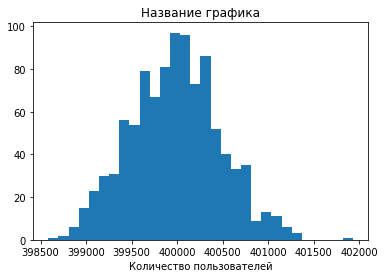

In [59]:
# Код ревьюера

s = np.random.normal(mu, sigma, 1000) # генерируем значения для нормального распределения


plt.hist(s, 30) # строим гистограмму
plt.title('Название графика')
plt.xlabel('Количество пользователей')

plt.show()

Вывод: вероятность того, что уведомление откроют не более 399,5 тыс. пользователей составила примерно 15%.

### Общий вывод

#### Этап 1. Предобработка данных.
Прежде чем анализировать данные, необходимо было их проверить на наличие пропусков и дубликатов, и привести в состояние, подходящее для анализа. В данном этапе были проведены следующие действия:
- Изменения типов данных (а именно: столбец date).
- Поиск и обработка пропущенных значений.
- Поиск и удаление дубликатов.
- Объединение данных для более удобной дальнейшей работы с ними.

#### Этап 2. Исследование данных в соответствии с поставленными вопросами.

##### Описана и визуализирована общая информация о пользователях и поездках:
    1. частота встречаемости городов (Наиболее популярен сервис в Пятигорске, наименьшей популярностью пользуется в Москве.)
    2. соотношение пользователей с подпиской и без подписки (Пользователей без подписки больше примерно на 20%)
    3. возраст пользователей ( Большинство пользователей сервиса в возрасте от 20 до 30 лет.)
    4. расстояние, которое пользователь преодолел за одну поездку (На основании этой гистограммы мы можем следать вывод, что клиенты сервиса чаще всего используют самокаты для поездок на расстояние от 2 до 5 км.)
    5. продолжительность поездок ( Длительность поездки в среднем от 10 до 30 минут.)
    
##### Подсчитана помесячная выручка, которую принёс каждый пользователь.

##### Проверены гипотезы:

###### Тратят ли пользователи с подпиской больше времени на поездки?
Да, пользовтели с подпиской действительно тратят больше времени на поездки, чем пользователи без подписки.

###### Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров (оптимальное расстояние с точки зрения износа самоката)? 
Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

###### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?
Действительно, помесячная выручка от пользователей с подпиской выше. Такие пользователи "выгоднее" компании.

##### Проведены исследования для проведения маркетинговой акции.

1. Для выполнения плана по продлению подписки 100 пользователями нужно разослать примерно 1200 промокодов.
2. Вероятность того, что уведомление, отправленное отделом маркетинга, откроют не более 399,5 тыс. пользователей составила примерно 15%


<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> 


Отличный итоговый вывод!

    
    
**Хочу обратить твое внимание на то, что после исправления замечаний в некоторых пунктах исследования могут измениться результаты, поэтому нужно будет подкорректировать выводы.**
</div>